In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
RUNDATA_ROOT = './rundata'
rgb_cifar10_100ep = pd.read_csv(RUNDATA_ROOT + '/rgb3000im_50ep_linear_regression_eval_cifar10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
depth_cifar10_100ep = pd.read_csv(RUNDATA_ROOT + '/deptheuclidean3000im_50ep_linear_regression_eval_cifar10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
rgb_stl10_100ep = pd.read_csv(RUNDATA_ROOT + '/rgb3000im_50ep_linear_regression_eval_stl10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
depth_stl10_100ep = pd.read_csv(RUNDATA_ROOT + '/deptheuclidean3000im_50ep_linear_regression_eval_stl10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
rgb_imgs_equal_stl10_100ep = pd.read_csv(RUNDATA_ROOT + '/rgb3000im_50ep_img_resize_linear_regression_eval_stl10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
depth_imgs_equal_stl10_100ep = pd.read_csv(RUNDATA_ROOT + '/deptheuclidean3000im_50ep_img_resize_linear_regression_eval_stl10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
rgb_brightness_cifar10_100ep = pd.read_csv(RUNDATA_ROOT + '/brightness3000im_50ep_linear_regression_eval_cifar.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
rgb_brightness_stl10_100ep = pd.read_csv(RUNDATA_ROOT + '/brightness3000im_50ep_linear_regression_eval_stl10.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
low_luminosity_stl10_100ep = pd.read_csv(RUNDATA_ROOT + '/lowluminosity3000im_50ep_linear_regression_eval_stl10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
low_luminosity_cifarl10_100ep = pd.read_csv(RUNDATA_ROOT + '/lowluminosity3000im_50ep_linear_regression_eval_cifar10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
highfov_stl10_100ep = pd.read_csv(RUNDATA_ROOT + '/highfov3000im_50ep_linear_regression_eval_stl10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
lowfov_stl10_100ep = pd.read_csv(RUNDATA_ROOT + '/lowfov3000im_50ep_linear_regression_eval_stl10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
highfov_cifar10_100ep = pd.read_csv(RUNDATA_ROOT + '/highfov3000im_50ep_linear_regression_eval_cifar10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
lowfov_cifar10_100ep = pd.read_csv(RUNDATA_ROOT + '/lowfov3000im_50ep_linear_regression_eval_cifar10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')


Data = [rgb_cifar10_100ep, depth_cifar10_100ep, rgb_stl10_100ep, depth_stl10_100ep, rgb_imgs_equal_stl10_100ep,
depth_imgs_equal_stl10_100ep, rgb_brightness_cifar10_100ep, rgb_brightness_stl10_100ep, low_luminosity_stl10_100ep, 
low_luminosity_cifarl10_100ep,highfov_stl10_100ep,lowfov_stl10_100ep, highfov_cifar10_100ep, lowfov_cifar10_100ep]

Datasets = ['rgb_cifar10', 'depth_cifar10', 'rgb_stl10', 'depth_stl10', 'rgb_imgs_equal_stl10',
'depth_imgs_equal_stl10', 'rgb_brightness_cifar10', 'rgb_brightness_stl10', 'low_luminosity_stl10', 
'low_luminosity_cifarl10','highfov_stl10','lowfov_stl10', 'highfov_cifar10', 'lowfov_cifar10']


In [3]:
def graph_downstream_performance(dataset_frame, modality, dataset_name):
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    sns.lineplot(data=dataset_frame, ax=axes[0])
    sns.lineplot(data=dataset_frame['Top5 Test Accuracy'], ax=axes[1])
    fig.suptitle(f"SimCLR Pretrained on {modality}: Logistic Classification ({dataset_name})")
    print('Maximum Top5 Accuracy: ', dataset_frame['Top5 Test Accuracy'].max(), 
        '\nAt Epoch: ', dataset_frame['Top5 Test Accuracy'].idxmax())
    
def graph_top5_comparison_two(model_a, model_b, modal_a, modal_b, dataset):
    a = model_a['Top5 Test Accuracy'].rename(modal_a)
    b = model_b['Top5 Test Accuracy'].rename(modal_b)
    top5_comparison = pd.concat([a,b], axis = 1, ignore_index=False)

    sns.lineplot(data=top5_comparison).set(title=f"({dataset}) Top5 Train Accuracy: {modal_a} vs {modal_b} ")

    print('Maximum Top5 Accuracy: ', model_a['Top5 Test Accuracy'].max(), 
        '\nAt Epoch: ', model_a['Top5 Test Accuracy'].idxmax())
    print('Maximum Top5 Accuracy: ', model_b['Top5 Test Accuracy'].max(), 
        '\nAt Epoch: ', model_b['Top5 Test Accuracy'].idxmax())
    print(f"Difference Between Max Top5 Accuracy: ({modal_a} - {modal_b})", model_a['Top5 Test Accuracy'].max() - model_b['Top5 Test Accuracy'].max())

def graph_top5_comparison_many(models, modals, dataset):
    for i in range(len(models)):
        models[i] = models[i]['Top5 Test Accuracy'].rename(modals[i])

    top5_comparison = pd.concat(models, axis = 1, ignore_index=False)

    sns.lineplot(data=top5_comparison).set(title=f"({dataset}) Top5 Train Accuracy: {modals} ")

    for i in range(len(models)):
        print(f'Maximum Top5 Accuracy: {modals[i]}', models[i].max(), 
            '\nAt Epoch: ', models[i].idxmax())
    

## I. Finetuned and Evaluated against the CIFAR10 Database

Maximum Top5 Accuracy:  69.15499114990234 
At Epoch:  13.0
Maximum Top5 Accuracy:  71.80204772949219 
At Epoch:  13.0
Difference Between Max Top5 Accuracy: (rgb - depth) -2.6470565795898438


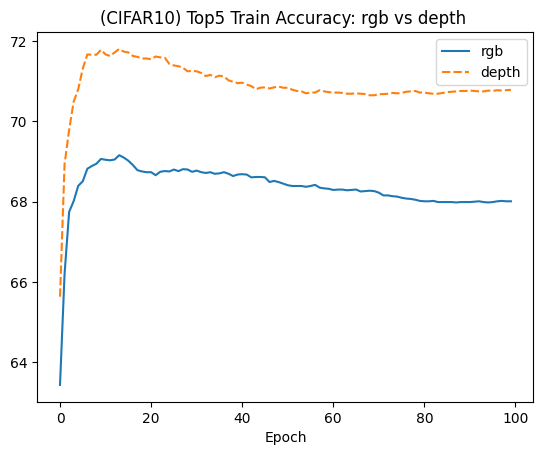

In [4]:
graph_top5_comparison_two(rgb_cifar10_100ep, depth_cifar10_100ep, 'rgb', 'depth', 'CIFAR10')

In [5]:
cifar_epoch0 = pd.concat([rgb_cifar10_100ep.head(1),depth_cifar10_100ep.head(1)],axis=0)
cifar_epoch0['Model'] = ['rgb_cifar10', 'depth_cifar10']
cifar_epoch0


,Top1 Train Accuracy,Top1 Test Accuracy,Top5 Test Accuracy,Model
Epoch,,,,
0.0,13.773118,16.214958,63.435207,rgb_cifar10
0.0,14.947783,17.392004,65.631889,depth_cifar10


## II. Finetuned and Evaluated against the STL10 Database

Maximum Top5 Accuracy:  73.10546875 
At Epoch:  75.0
Maximum Top5 Accuracy:  72.77587890625 
At Epoch:  94.0
Difference Between Max Top5 Accuracy: (rgb - depth) 0.32958984375


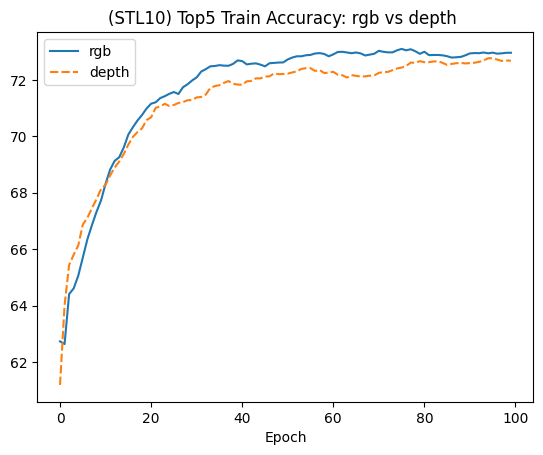

In [6]:
graph_top5_comparison_two(rgb_stl10_100ep, depth_stl10_100ep, 'rgb', 'depth', 'STL10')

Maximum Top5 Accuracy:  61.85791015625 
At Epoch:  25.0
Maximum Top5 Accuracy:  62.44384765625 
At Epoch:  23.0
Difference Between Max Top5 Accuracy: (rgb - depth) -0.5859375


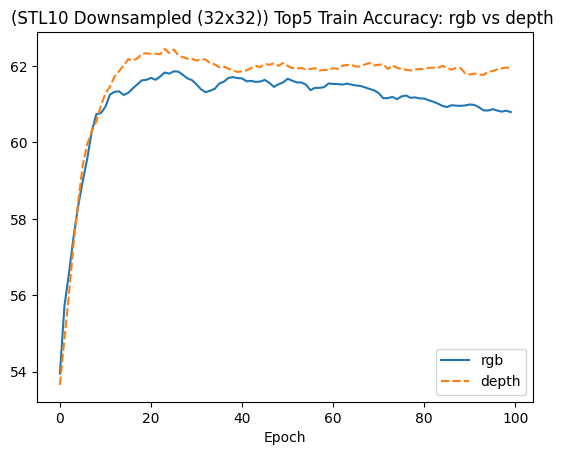

In [7]:
graph_top5_comparison_two(rgb_imgs_equal_stl10_100ep, depth_imgs_equal_stl10_100ep, 'rgb', 'depth', 'STL10 Downsampled (32x32)')

In [8]:
stl10_epoch0 = pd.concat([rgb_stl10_100ep.head(1),depth_stl10_100ep.head(1)],axis=0)
stl10_epoch0['Model'] = ['rgb_stl10', 'depth_stl10']
stl10_epoch0


,Top1 Train Accuracy,Top1 Test Accuracy,Top5 Test Accuracy,Model
Epoch,,,,
0.0,12.886029,14.401855,62.727051,rgb_stl10
0.0,12.432216,14.091797,61.181641,depth_stl10


## III. Analysis and Conclusion

- Both SimCLR models pretrained on Depth and RGB performed well above average in the image classificationd ownstream task at Epoch 0, indicating that both models learned useful representations on images during the pretraining step, even before finetuning. 
    - When testing on the CIFAR10 dataset at epoch 0, we notice that the depth model performs better overall compared to the RGB model.
    - When testing on the STL10 dataset at epoch 0, we notice that the performances of both models are very close, with rgb performing a little better.
    - The observations above leads us to infer that the SimCLR model trained on depth data learned better representations from the image data during the pretraining step as compared to the SimCLR model trained on RGB data.

- The Maximum Top5 Accuracies of the models Finetuned/Tested on CIFAR10 as follows
    - SimCLR pretrained on RGB   -> Finetuned/Tested on CIFAR10:      69.15499114990234 @ Epoch 13.0
    - SimCLR pretrained on Depth -> Finetuned/Tested on CIFAR10:      71.80204772949219 @ Epoch 13.0
    - Difference Between Max Top5 Accuracy (rgb - depth):  -2.6470565795898438
    
- The Maximum Top5 Accuracies of the models Finetuned/Tested on STL10are as follows        
    - SimCLR pretrained on RGB   -> Finetuned/Tested on STL10:        73.10546875       @ Epoch 75.0
    - SimCLR pretrained on Depth -> Finetuned/Tested on STL10:        72.77587890625    @ Epoch 94.0
    - Difference Between Max Top5 Accuracy (rgb - depth):  0.32958984375

- We notice that the models performed better on the STL10 dataset, this is worth further investigation, since the STL10 dataset contains supervised training images (500 images/class @ 10 classes) vs CIFAR (600 images/ class @ 10 classes). 
    - A possible avenue for investigation is varying the input image sizes. While CIFAR has more images for training, its image size is 32x32, while STL10 has an image size of 96x96. What will happen if we downsample STL10 to 32x32?

- The SimCLR model pretrained on RGB performed marginally better than the model trained on Depth when testing on the STL10 dataset, while the SimCLR model pretrained on depth significantly outperformed the one pretrained on RGB when testing on the CIFAR10 dataset. This may indicate that a SimCLR model pretrained on depth outperforms those that are trained on RGB when operating on low resolution images, while SimCLR models pretrained on RGB show their strength on higher-resolution or more detailed images.
    - We will explore this further when we start varying the lighting, noise, image size, and blur (among others) of the dataset used for pretraining the models.
    - We may also explore this by conducting similar experiments on other SSL methods such as MoCo

- We downsampled stl10 during the finetuning phase and discovered that the performance of the depth pretrained model now exceedes that of the rgb pretrained model, as compared to the other way around without downsampling. This lends strength to our hypothesis above that the depth pretrained models performs better on low-resolution images while the rgb pretrained model performs better on higher resolution images
    

### IV. Brightness Comparisons

Maximum Top5 Accuracy: rgb-bright-cifar 69.09467315673828 
At Epoch:  9
Maximum Top5 Accuracy: rgb-bright-stl 71.51123046875 
At Epoch:  63
Maximum Top5 Accuracy: rgb-cifar 69.15499114990234 
At Epoch:  13.0
Maximum Top5 Accuracy: rgb-stl 73.10546875 
At Epoch:  75.0


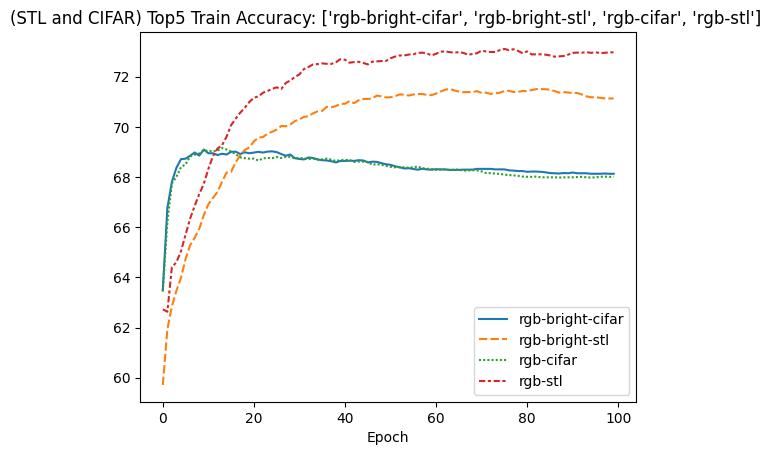

In [12]:
graph_top5_comparison_many([rgb_brightness_cifar10_100ep,rgb_brightness_stl10_100ep,rgb_cifar10_100ep,rgb_stl10_100ep], ["rgb-bright-cifar", "rgb-bright-stl","rgb-cifar","rgb-stl"],"STL and CIFAR")

The performance of the rgb pretrained model adjusted to be 2x brighter than normal and pretrained on *STL10* is less than the performance of baseline rgb. However, we observe that the performance of the brightness-adjusted RGB model finetuned on CIFAR is roughly the same as that of the baseline rgb model finetuned on CIFAR.

As of yet, this is unexplained. Perhaps we should also repeat the test on a downsampled STL10 on the brightness-adjusted pretrained rgb model to discover.

### V. Luminosity Tests

Maximum Top5 Accuracy: low_luminosity_stl10_100ep 71.05712891 
At Epoch:  69
Maximum Top5 Accuracy: rgb_stl10_100ep 73.10546875 
At Epoch:  75.0
Maximum Top5 Accuracy: low_luminosity_cifarl10_100ep 71.27470398 
At Epoch:  9
Maximum Top5 Accuracy: rgb_cifar10_100ep 69.15499114990234 
At Epoch:  13.0


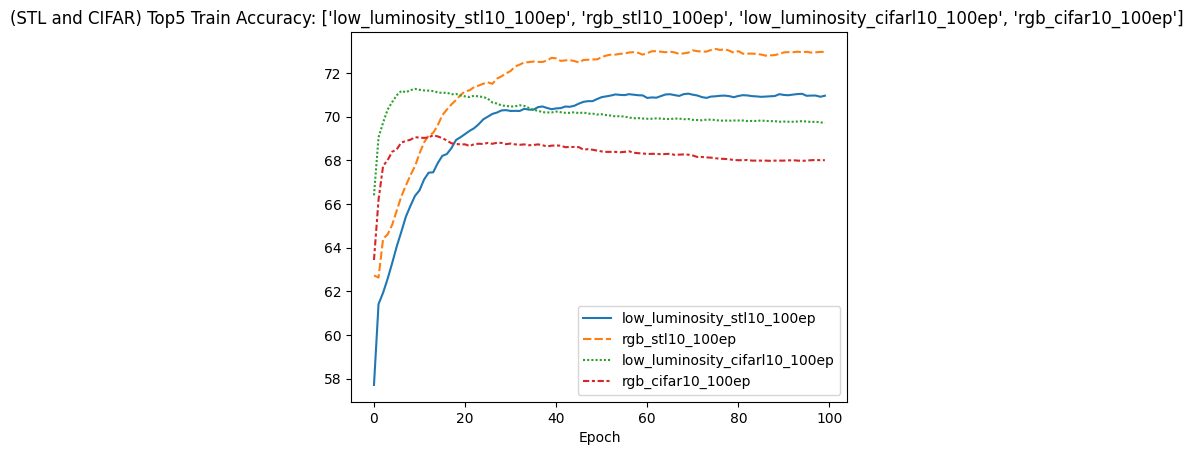

In [15]:
graph_top5_comparison_many([low_luminosity_stl10_100ep,rgb_stl10_100ep,low_luminosity_cifarl10_100ep,rgb_cifar10_100ep], ["low_luminosity_stl10_100ep", "rgb_stl10_100ep", "low_luminosity_cifarl10_100ep","rgb_cifar10_100ep"], "STL and CIFAR")

Maximum Top5 Accuracy: low-luminosity-stl10 71.05712891 
At Epoch:  69
Maximum Top5 Accuracy: low-luminosity-cifarl10 71.27470398 
At Epoch:  9


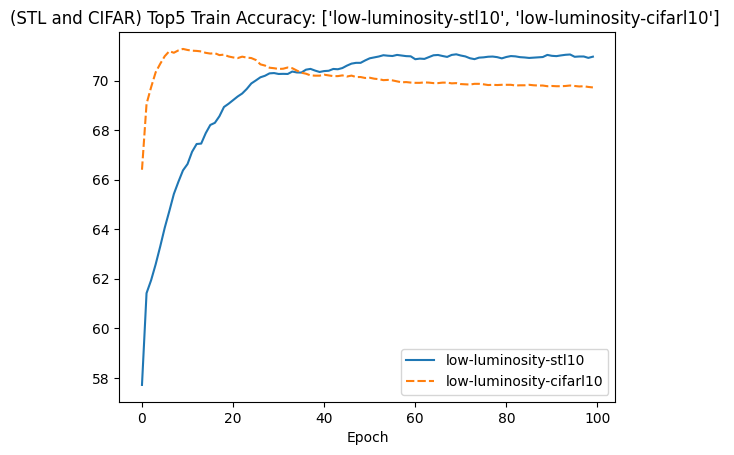

In [13]:
graph_top5_comparison_many([low_luminosity_stl10_100ep,low_luminosity_cifarl10_100ep], ["low-luminosity-stl10", "low-luminosity-cifarl10"],"STL and CIFAR")

As we can see from the results above, the performance of the low-luminosity adjusted pretrained model finetuned on cifar outperforms that of the same pretrained model pretrained on stl10. This was not the case in the baseline rgb models finetuned on stl and cifar. 

Although we also note that out of the four models graphed above, the baseline rgb finetuned on stl10 still outperforms the rest. 

We observe a boost in the base performance of the model finetuned on cifar, but a reduction in the performance when the model is finetuned in stl. It is currently unexplaied as to why lowering the luminosity of the images for pretraining positively affects the performance on cifar and negatively affects on stl10.

### VI. Field of View Tests

Maximum Top5 Accuracy: rgb-stl10 73.10546875 
At Epoch:  75.0
Maximum Top5 Accuracy: rgb-cifar10 69.15499114990234 
At Epoch:  13.0
Maximum Top5 Accuracy: highfov-cifar10 69.44508362 
At Epoch:  6
Maximum Top5 Accuracy: lowfov-cifar10 68.18704224 
At Epoch:  8
Maximum Top5 Accuracy: highfov-stl10 71.92626953 
At Epoch:  82
Maximum Top5 Accuracy: lowfov-stl10 72.31445313 
At Epoch:  58


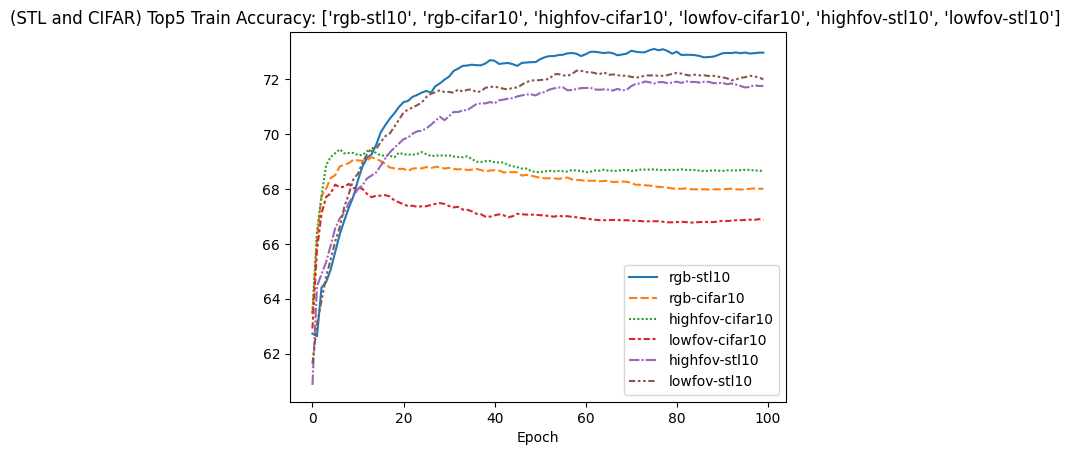

In [14]:
graph_top5_comparison_many([rgb_stl10_100ep,rgb_cifar10_100ep,highfov_cifar10_100ep,lowfov_cifar10_100ep,highfov_stl10_100ep,lowfov_stl10_100ep], ["rgb-stl10","rgb-cifar10","highfov-cifar10","lowfov-cifar10","highfov-stl10","lowfov-stl10"],"STL and CIFAR")